In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

### Cargar el conjunto de datos

In [2]:
data = pd.read_csv('data/training.csv')
data.head()

,text,label
0,i didnt feel humiliated,0
1,i can go from feeling so hopeless to so damned...,0
2,im grabbing a minute to post i feel greedy wrong,3
3,i am ever feeling nostalgic about the fireplac...,2
4,i am feeling grouchy,3


### Información descriptiva

In [3]:
data.shape

(16000, 2)

In [4]:
data.describe()

,label
count,16000.000000
mean,1.565937
std,1.501430
min,0.000000
25%,0.000000
50%,1.000000
75%,3.000000
max,5.000000


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16000 entries, 0 to 15999
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   text    16000 non-null  object
 1   label   16000 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 250.1+ KB


In [6]:
data['label'].value_counts()

label
1    5362
0    4666
3    2159
4    1937
2    1304
5     572
Name: count, dtype: int64

### Revisión de duplicados

In [7]:
data['text'].value_counts()

text
i feel on the verge of tears from weariness i look at your sweet face and cant help but tenderly kiss your cheeks                                                                          2
i feel kind of strange                                                                                                                                                                     2
i feel more adventurous willing to take risks img src http cdn                                                                                                                             2
i write these words i feel sweet baby kicks from within and my memory is refreshed i would do anything for this boy                                                                        2
i still feel a craving for sweet food                                                                                                                                                      2
                                                  

In [8]:
# Obtener los textos que aparecen exactamente 2 veces
texts_with_count_2 = data['text'].value_counts()
texts_with_count_2 = texts_with_count_2[texts_with_count_2 == 2].index

# Filtrar el DataFrame para incluir solo esos textos
filtered_data = data[data['text'].isin(texts_with_count_2)]

filtered_data.sort_values('text', inplace=True)
filtered_data.reset_index(drop=True, inplace=True)

filtered_data

/var/folders/4w/0qtssn4s1_bck4zfcq9k819c0000gn/T/ipykernel_36186/679981711.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_data.sort_values('text', inplace=True)


,text,label
0,i am not amazing or great at photography but i...,2
1,i am not amazing or great at photography but i...,1
2,i began to feel accepted by gaia on her own terms,1
3,i began to feel accepted by gaia on her own terms,2
4,i bet taylor swift basks in the knowledge that...,4
...,...,...
57,i write these words i feel sweet baby kicks fr...,2
58,im still not sure why reilly feels the need to...,5
59,im still not sure why reilly feels the need to...,4
60,ive also made it with both sugar measurements ...,1


### Frecuencia de las emociones

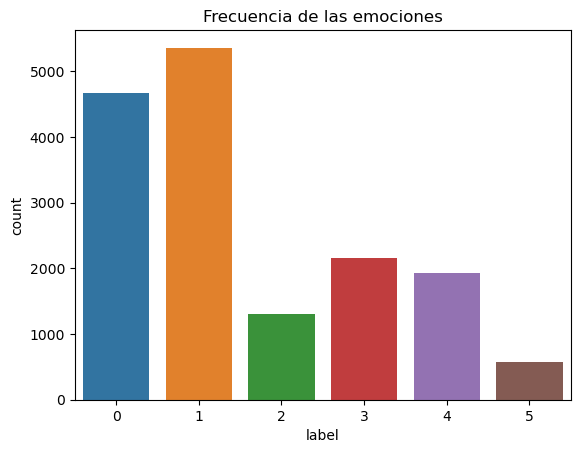

In [9]:
sns.countplot(data=data, x='label')
plt.title('Frecuencia de las emociones')
plt.show()

### Frecuencia y distribución de los tweets

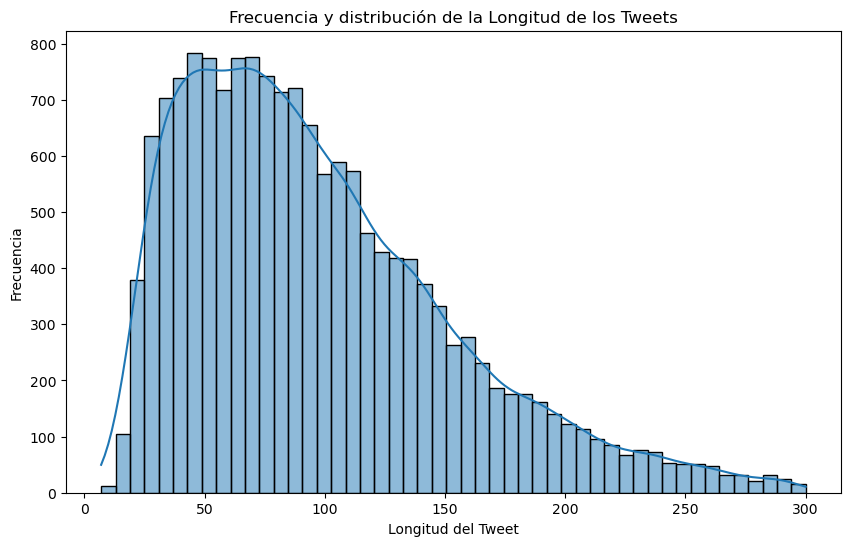

In [10]:
data['length'] = data['text'].apply(len)
plt.figure(figsize=(10, 6))
sns.histplot(data['length'], kde= True)
plt.xlabel('Longitud del Tweet')
plt.ylabel('Frecuencia')
plt.title('Frecuencia y distribución de la Longitud de los Tweets')
plt.show()

In [11]:
data['length'].describe()

count    16000.000000
mean        96.845812
std         55.904953
min          7.000000
25%         53.000000
50%         86.000000
75%        129.000000
max        300.000000
Name: length, dtype: float64

### Frecuencia de las palabras

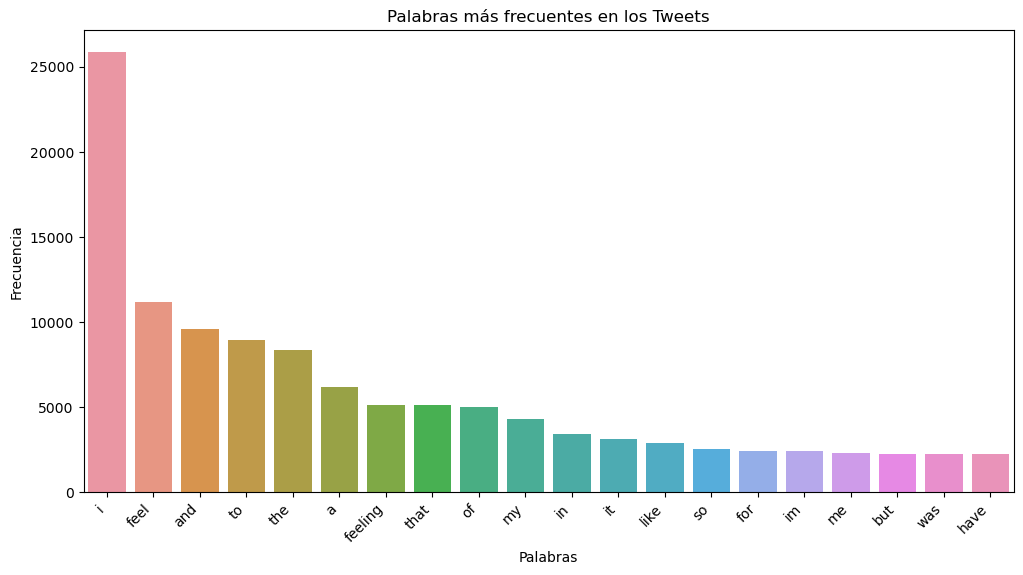

In [12]:
from collections import Counter
all_words = ' '.join([text for text in data['text']])
word_counts = Counter(all_words.split()) 
most_common = word_counts.most_common(20) 
plt.figure(figsize=(12, 6))
sns.barplot(x=[word[0] for word in most_common], y=[word[1] for word in most_common])
plt.xlabel('Palabras')
plt.ylabel('Frecuencia')
plt.title('Palabras más frecuentes en los Tweets')
plt.xticks(rotation=45, ha='right')
plt.show()

### Relación entre la longitud del tweet y la emoción

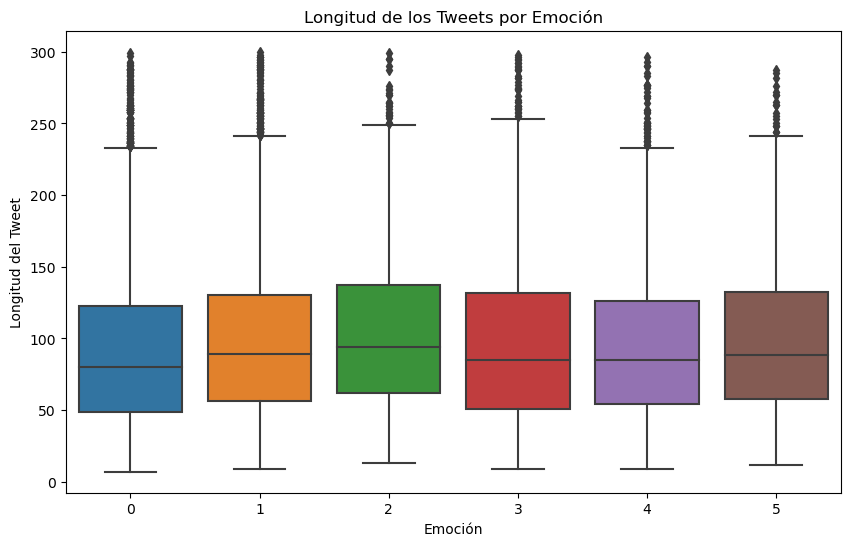

In [13]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='label', y='length', data=data)
plt.xlabel('Emoción')
plt.ylabel('Longitud del Tweet')
plt.title('Longitud de los Tweets por Emoción')
plt.show()

In [14]:
lol=data['text'].tolist()
lol

['i didnt feel humiliated',
 'i can go from feeling so hopeless to so damned hopeful just from being around someone who cares and is awake',
 'im grabbing a minute to post i feel greedy wrong',
 'i am ever feeling nostalgic about the fireplace i will know that it is still on the property',
 'i am feeling grouchy',
 'ive been feeling a little burdened lately wasnt sure why that was',
 'ive been taking or milligrams or times recommended amount and ive fallen asleep a lot faster but i also feel like so funny',
 'i feel as confused about life as a teenager or as jaded as a year old man',
 'i have been with petronas for years i feel that petronas has performed well and made a huge profit',
 'i feel romantic too',
 'i feel like i have to make the suffering i m seeing mean something',
 'i do feel that running is a divine experience and that i can expect to have some type of spiritual encounter',
 'i think it s the easiest time of year to feel dissatisfied',
 'i feel low energy i m just thirst